# Classification ignition point 

This project is a classification problem

It is to determine whether a point has a probability to be an ignition point for wildfire. The ignition point is where the wildfire starts. To know the probability where a fire would start is central at Descartes because it will help us to better simulate wildfires.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter errors while using the notebook.

In [1]:
import random
from pathlib import Path
import pandas as pd

In [2]:
%reload_ext autoreload
%autoreload 2

# Parameters

In [3]:
DATA_PATH = Path("data")
DATAFRAME_FOLDER_PATH = DATA_PATH / "classification_dataframe"

# Download data

In [63]:
dataframe_path = DATAFRAME_FOLDER_PATH / "dataset.csv"

In [64]:
df = pd.read_csv(dataframe_path, index_col=0)
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,0.0,1.000000,0.0,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,2003-02-17,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.0,0.416667,0.0,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,2012-02-26,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.0,0.666667,0.0,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,2004-11-10,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.0,0.000000,0.0,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,2003-03-19,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.0,0.750000,0.0,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


# Structure of the dataframe and Task


- Each row consists of an ignition or non-ignition point with the given features associated. The features were chosen as potentially influencing ignition.


- The last column named `ignition` says if the point was a real ignition point (meaning that it occurred historically), in that case the value is `1`. Otherwise, when the value is `0`, it means that it is a 'non-ignition point'.


- The columns `cropland` to `wetland` gives the ratio of each of the vegetation classes under which the ignition or non-ignition point lies. The sum of these ratios should be equal to 1. For more information refer to this website: https://lcviewer.vito.be/


- The temperatures should be in degrees celsius `(°C)`.


- The weather data come from different sources and they might have different units.

| Column name | Definition | Unit |
|--------|-----------|--------|
| `ignition`   | Target column| Boolean: {1,0} |
| `distance_{feature}` | Distance to nearest feature  |  Meters (m) |
| vegetation class: from `cropland` to `wetland`  |  Ratio of each of the vegetation classes  under which the ignition or non-ignition point lies    |  No unit (between 0 and 1)  |
| `aspect`  |  Orientation of the slope    |  Degrees (°)  |
| `elevation`  |  elevation value    |  Meters  |
| `slope`  |  Slope value    |  Degrees (°)  |
| `pop_dens`  |  Population density value    |  Persons per km2  |
| `max_temp`  |  Maximum temperature of the day    |  Degrees celsius (°C)  |
| `avg_temp`  |  Average temperature of the day   |  Degrees celsius (°C)  |
| `max_wind_vel`  |  Maximum wind velocity of the day    |  Meters per second (m/s)  |
| `avg_wind_angle`  |  Average angle of the vector wind over the day    |  Degrees (°)  |
| `avg_rel_hum`  |  Average relative humidity over the day    |  %  |
| `avg_soil`  |  Average soil moisture of the day    |  m3/m3  |
| `sum_prec`  |  Cumulative rainfall precipitation of the day    |  Millimeters (mm)  |
| `yearly_avg_temp`  |  Average temperature over the year    |  Degrees celsius (°C)  |
| `anom_{feature}`  |  Standardized anomaly of weather for the given day over the last 30 years. When the anomaly is positive, it means that the feature value is greater that the 30-year average    |  No unity |
| `forest`  |  Sum of all the columns where the names start with `forest`   |  No unit  |
| `vegetation_class`  |  Vegetation with the max occurrence in the vicinity of the ignition/non-ignition point    |  Without unit  |
| `Year`  |  Year of ignition    |  Without unit  |
| `max_max_temp`  |  Missing information    |  Missing information  |



# Task


🚨 **Your task is to design a classification algorithm to predict whether a point is an ignition point or not. The target column is `ignition`** 🚨

You can import any package you want.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,0.0,1.000000,0.0,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,2003-02-17,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.0,0.416667,0.0,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,2012-02-26,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.0,0.666667,0.0,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,2004-11-10,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.0,0.000000,0.0,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,2003-03-19,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.0,0.750000,0.0,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


In [67]:
df.describe()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,forest_mixed,...,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,max_max_temp,yearly_avg_temp,ignition
count,22030.000000,22030.000000,22030.000000,22030.000000,22030.000000,22030.000000,22030.0,22030.000000,22030.000000,22030.0,...,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,22035.000000,15204.000000,22035.000000
mean,23646.387792,5966.777537,5152.597702,30127.951951,0.006415,0.013557,0.0,0.326108,-4584.657286,0.0,...,158.859675,197.707583,76.109929,0.285717,1.662872,0.426235,2011.278784,59.230929,14.999755,0.150669
std,19248.657525,7515.660146,6924.754655,30099.446768,0.057848,0.088239,0.0,0.433120,20915.699938,0.0,...,135.801507,83.336828,8.027890,0.078390,3.230198,0.455856,5.693506,7.983432,0.100675,0.357734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-100000.000000,0.0,...,-4.109107,0.792745,40.705662,0.050758,-0.000007,0.000000,2001.000000,34.109174,14.597322,0.000000
25%,9568.829605,707.106781,250.000000,8265.137627,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,7.687609,133.581253,70.623573,0.233063,0.000000,0.000000,2006.000000,53.440945,14.931427,0.000000
50%,18494.931738,2610.076627,1581.138830,20846.161854,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,276.348625,203.072937,76.005028,0.287844,0.154361,0.166667,2012.000000,58.614709,14.999861,0.000000
75%,32310.988843,8384.323013,7941.190087,41340.053217,0.000000,0.000000,0.0,0.916667,0.000000,0.0,...,280.721741,257.033798,81.626057,0.346534,1.854040,1.000000,2016.000000,64.858667,15.068628,0.000000
max,110474.261708,43784.986011,40094.419811,159274.919557,1.000000,1.000000,0.0,1.000000,0.000000,0.0,...,292.551632,358.530182,98.558968,0.501387,40.440075,1.000000,2021.000000,90.376239,15.369208,1.000000


# Data cleaning

First of all, I have to clean the dataset so I'll have a look to NaN values

In [68]:
for column in df:
    print(df[column].isna().sum())

0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
32
0
0
6831
0


I'll have a look to the categorical variable 'vegetation_class'; there are 32 NaN values but maybe there could be other problems inside.

In [69]:
df.vegetation_class.unique()

array(['forest', 'wetland', 'herbaceous_vegetation', 'Forestt',
       'shrubland', 'water', 'urban', nan, '$herb$aceous_vegetation'],
      dtype=object)

Indeed, I noticed that there are some misreported values, so I will correct them.
With the following code I will change the 'vegetation_class' of two uncorrect rows: I will correct the rows with '$herb$aceous_vegetation' and 'Forestt'.

In [70]:
df[df.vegetation_class == '$herb$aceous_vegetation']= df[df.vegetation_class == '$herb$aceous_vegetation'].replace(['$herb$aceous_vegetation'],'herbaceous_vegetation')
#df[df.vegetation_class == '$herb$aceous_vegetation']
df[df.vegetation_class == 'Forestt']= df[df.vegetation_class == 'Forestt'].replace(['Forestt'],'forest')
#df[df.vegetation_class=='Forestt']
df.vegetation_class.unique()


array(['forest', 'wetland', 'herbaceous_vegetation', 'shrubland', 'water',
       'urban', nan], dtype=object)

Now, the problem is only on the NaN values, so I'll continue to analyze my dataset. I discovered that there are 3 columns all set to zero-value ('forest_deciduous_needle', 'forest_mixed', 'moss_lichen'), so I can drop them, they are not relevant.

In [71]:
df.forest_deciduous_needle.unique()
df.forest_mixed.unique()
df.moss_lichen.unique()

array([ 0., nan])

In [72]:
df = df.drop('forest_deciduous_needle', axis = 1)
df = df.drop('forest_mixed', axis = 1)
df = df.drop('moss_lichen', axis = 1)

I recover the NaN analysis: I select one of the column with 5 NaN and I take the corresponding rows.
It turns out that in 5 rows, 19 over 42 columns are NaN; since this happens only in 5 rows over 22035, we can drop them without loss of strong information. Trying to estimate the missing values would be too much demanding in comparison to the number of rows.

In [73]:
indici_na = df[df.distance_fire_stations.isna()].index
df[df.distance_fire_stations.isna()]
#indici_na

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
8031,2002-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.641388,71.991280,0.115327,0.0,0.0,NaN,2002,61.709884,14.995481,0
10398,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,157.834579,71.008575,0.251052,0.0,0.0,NaN,2017,62.269799,15.037558,0
14704,2016-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280.659943,78.968040,0.307418,0.0,0.0,NaN,2016,61.817973,15.052976,0
17444,2003-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,205.237061,80.847252,0.280676,0.0,0.0,NaN,2003,59.260843,15.037933,0
20679,2005-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.377090,78.182716,0.236421,0.0,0.0,NaN,2005,60.725573,14.815469,0


In [74]:
df = df.drop(indici_na)
for column in df:
    print(df[column].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
27
0
0
6831
0


Now the missing values are present only in 'vegetation_class' and in 'yearly_avg_temp'.

Another action is to drop the 'Date' column, since it is totally irrelevant in our analysis.

In [75]:
df = df.drop('Date', axis = 1)
df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


Now I have to take into account the presence of the Nan, in particularly I consider the column 'yearly_avg_temp'.
There are basically two possibilities: drop the column or use a technique to estimate the NaN values.
I decided to drop the column for many reasons: first of all, the variance is very small across all the data in the column, so I can suppose that the dependence is not so high, and this fact is enforced by the correlation matrix, indeed correlation between ignition and yearly_avg_temp is ~0.012.

In [76]:
df[['yearly_avg_temp', 'ignition']].corr()
df.yearly_avg_temp.describe()

count    15199.000000
mean        14.999759
std          0.100679
min         14.597322
25%         14.931413
50%         14.999856
75%         15.068645
max         15.369208
Name: yearly_avg_temp, dtype: float64

In [77]:
df = df.drop('yearly_avg_temp', axis = 1)
df.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,1


I almost adjusted all the NaN values, the remaining column is 'vegetation_class'. As said in the description, vegetation class is the highest ratio of the previous classes, so the sum of all the previous classes (from cropland to wetland) should be always equal to 0, but I noticed that there is a missing class corresponding to 'cropland'. Indeed, when 'cropland' is the highest value, the class is a NaN. My intuition suggests me that 'cropland' class is missing and all the NaN values in 'vegetation_class' must be set to 'cropland'.

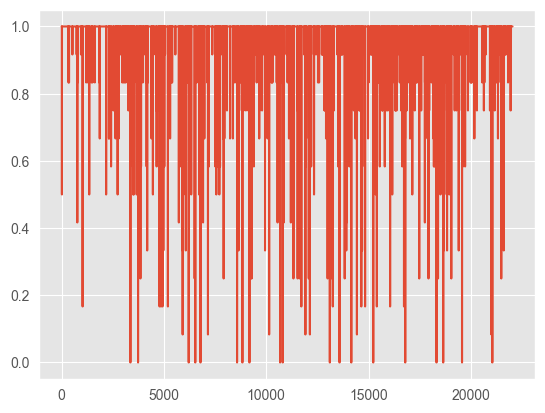

In [78]:
df[df.vegetation_class.isna()]
#new_df[new_df.vegetation_class.isna()].iloc[:, 5:15].max(axis=1)

df[df.sprarse_vegetation > 0.5] #classified as herbaceous_vegetation, which seems to be coherent
test = df['forest'] + df['water'] + df['herbaceous_vegetation'] + df['wetland'] + df['urban'] + df['shrubland'] + df['sprarse_vegetation']
plt.plot(test)

The analysis shows that 'cropland' has not been included in 'vegetation_class'. In 27 missing values, I noticed that the cropland values is always the highest, so all the points belonging to cropland have not been classified and the test above confirms this fact.
I assign the remaining nan values to cropland


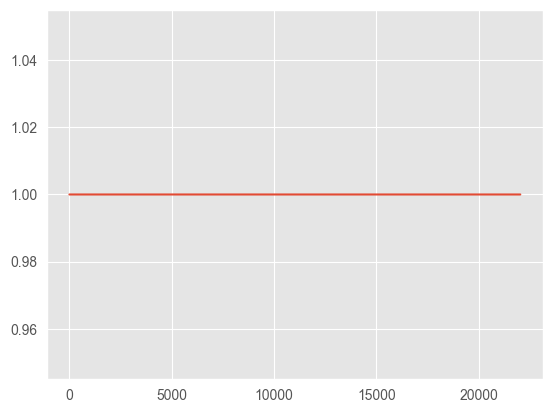

In [79]:
df.loc[df['vegetation_class'].isna(), 'vegetation_class']='cropland'
test = test + df['cropland']
plt.plot(test)


CORRELATION MATRIX

In [80]:
df.corr() #max_temp and max_max_temp have correlation of 1

C:\Users\David\AppData\Local\Temp\ipykernel_23412\1474707864.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #max_temp and max_max_temp have correlation of 1


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,max_max_temp,ignition
distance_fire_stations,1.000000,0.380998,0.597202,0.361672,-4.109216e-02,-0.089753,-0.157933,-0.002915,-0.182219,-0.078787,...,0.177206,-0.004632,-0.004945,0.114476,-0.141412,0.024765,-0.243551,-0.008939,-0.104301,-0.228656
distance_rivers,0.380998,1.000000,0.810262,0.511959,-5.275080e-02,-0.072211,-0.393945,-0.002696,-0.246586,-0.300005,...,0.405720,-0.001486,-0.065588,-0.101395,-0.293590,-0.285531,-0.491284,-0.007203,0.044370,-0.218113
distance_roads,0.597202,0.810262,1.000000,0.501996,-7.504581e-02,-0.077587,-0.360746,-0.006670,-0.247274,-0.249587,...,0.346209,-0.005622,-0.042441,-0.018912,-0.255832,-0.185321,-0.461069,-0.010728,-0.024913,-0.268259
distance_powerlines,0.361672,0.511959,0.501996,1.000000,-2.527940e-02,-0.070206,-0.338461,-0.001519,-0.216921,-0.154048,...,0.532158,-0.001569,-0.070887,-0.107333,-0.318020,-0.204134,-0.425787,-0.004821,0.014641,-0.205647
cropland,-0.041092,-0.052751,-0.075046,-0.025279,1.000000e+00,-0.015496,-0.079617,0.006489,-0.016849,0.070603,...,-0.014332,-0.011687,-0.029765,-0.004638,0.016609,-0.002574,-0.085684,-0.012438,0.015766,-0.022591
forest_deciduous_broad,-0.089753,-0.072211,-0.077587,-0.070206,-1.549613e-02,1.000000,-0.076020,0.005804,0.078933,-0.030414,...,-0.072732,-0.006669,0.050575,-0.021822,0.010408,0.009997,0.154313,-0.004491,-0.006093,0.097047
forest_evergreen_broad,-0.157933,-0.393945,-0.360746,-0.338461,-7.961733e-02,-0.076020,1.000000,-0.006621,-0.125350,-0.340918,...,-0.326574,0.009935,0.037423,0.132318,0.300918,0.241640,0.883029,0.014015,-0.037653,0.091934
forest_evergreen_needle,-0.002915,-0.002696,-0.006670,-0.001519,6.489341e-03,0.005804,-0.006621,1.000000,-0.005376,0.007485,...,0.002094,-0.196420,0.001164,-0.017213,-0.007299,-0.003778,-0.007414,-0.335774,0.005497,0.012867
forest_unknown,-0.182219,-0.246586,-0.247274,-0.216921,-1.684900e-02,0.078933,-0.125350,-0.005376,1.000000,0.036437,...,-0.169904,-0.001067,0.052317,-0.024074,0.086875,0.053755,0.313945,0.005237,0.012283,0.214991
herbaceous_vegetation,-0.078787,-0.300005,-0.249587,-0.154048,7.060314e-02,-0.030414,-0.340918,0.007485,0.036437,1.000000,...,-0.183795,-0.003971,0.036581,0.021387,0.063392,0.109559,-0.314575,0.001175,-0.012504,0.061074


max_temp and max_max_temp have correlation of 1: I drop one of them, namely 'max_max_temp'.

In [81]:
df = df.drop('max_max_temp', axis = 1)
#df = df.drop('Year', axis = 1)
df.head()


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,ignition
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,5.772759,276.253304,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,1
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,5.706931,3.610960,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,1
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,5.213350,278.800907,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,1
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,6.412321,5.787716,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,4.307997,5.503574,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,1


In [82]:
for column in df:
    print(df[column].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


I've cleaned the dateset, no more NaN values. Now I'm ready to explore a bit my dataset.

# Data Visualization

I start my data visualization and I immediately notice (but it was easily understandable) that we have unbalanced data, so I'll to take this fact into account in my further analysis.

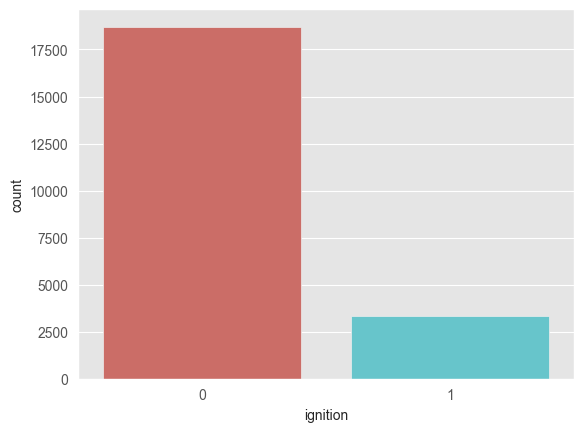

In [83]:
sns.countplot(x='ignition', data = df, palette='hls')
plt.show()
# Of course, we have unbalanced data

I analyse the mean divided by classes, and I noticed that cropland has no positive ignition points

In [84]:
df.groupby('vegetation_class').mean()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,ignition
vegetation_class,,,,,,,,,,,,,,,,,,,,,
cropland,23753.146083,2514.879082,374.055696,24893.709601,0.969136,0.000000,0.003086,-11111.111111,0.003086,0.021605,...,15.326242,6.070765,149.453192,143.755948,75.727395,0.286754,0.882222,0.006173,2010.777778,0.000000
forest,18526.525974,2014.097489,1721.532322,16327.600872,0.001473,0.028895,0.729806,-4765.843068,0.163246,0.057006,...,14.979962,4.680700,159.594150,203.725892,77.035779,0.312894,2.522361,0.921948,2011.360385,0.230228
herbaceous_vegetation,21057.168141,1758.095610,1958.933085,21929.846634,0.025664,0.004912,0.022700,-4154.764996,0.073704,0.833853,...,15.050199,4.892576,158.354867,203.028113,76.437424,0.293744,2.331548,0.101316,2011.279927,0.180473
shrubland,34622.095988,1443.546176,3138.985833,24940.014676,0.000000,0.002525,0.031566,-3030.303030,0.131313,0.213384,...,14.329267,5.194056,131.263297,199.190990,78.844508,0.302875,3.591368,0.165404,2010.015152,0.212121
urban,3577.235167,916.970504,9.259259,4580.158951,0.009259,0.000000,0.029835,-1234.567901,0.118313,0.089506,...,17.796062,4.389587,152.781642,218.993088,72.095301,0.264092,1.282881,0.148148,2010.864198,0.493827
water,31168.006119,12857.755095,10949.901507,50434.428010,0.000082,0.000000,0.002559,-4575.727676,0.001809,0.007195,...,15.297856,7.347565,158.707778,188.595232,74.922307,0.250976,0.324542,0.004368,2011.208683,0.034287
wetland,21005.981497,3157.094735,1409.240733,43386.395271,0.002976,0.000372,0.053571,-5357.142857,0.059524,0.079241,...,15.961747,7.335864,153.664521,174.899189,74.176411,0.235276,1.194865,0.113467,2010.915179,0.294643


### Graphical visualization

Now I want to understand I bit more how data are distributed, in particular distiguishing the two classes og 'ignition'

<Axes: xlabel='vegetation_class'>

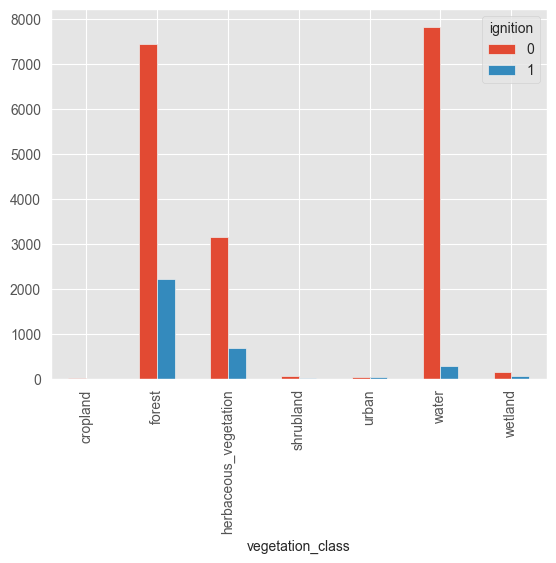

In [85]:
pd.crosstab(df.vegetation_class, df.ignition).plot(kind='bar')

Most common classes: forest, herbaceous_vegetation and water
High dependence on the vegetation_class, so it can have an high relevance on the prediction of ignition points

C:\Users\David\AppData\Local\Temp\ipykernel_23412\47062547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,max_temp,max_wind_vel,avg_temp,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,Year,ignition
distance_fire_stations,1.000000,0.380998,0.597202,0.361672,-4.109216e-02,-0.089753,-0.157933,-0.002915,-0.182219,-0.078787,...,-0.104301,0.177206,-0.004632,-0.004945,0.114476,-0.141412,0.024765,-0.243551,-0.008939,-0.228656
distance_rivers,0.380998,1.000000,0.810262,0.511959,-5.275080e-02,-0.072211,-0.393945,-0.002696,-0.246586,-0.300005,...,0.044370,0.405720,-0.001486,-0.065588,-0.101395,-0.293590,-0.285531,-0.491284,-0.007203,-0.218113
distance_roads,0.597202,0.810262,1.000000,0.501996,-7.504581e-02,-0.077587,-0.360746,-0.006670,-0.247274,-0.249587,...,-0.024913,0.346209,-0.005622,-0.042441,-0.018912,-0.255832,-0.185321,-0.461069,-0.010728,-0.268259
distance_powerlines,0.361672,0.511959,0.501996,1.000000,-2.527940e-02,-0.070206,-0.338461,-0.001519,-0.216921,-0.154048,...,0.014641,0.532158,-0.001569,-0.070887,-0.107333,-0.318020,-0.204134,-0.425787,-0.004821,-0.205647
cropland,-0.041092,-0.052751,-0.075046,-0.025279,1.000000e+00,-0.015496,-0.079617,0.006489,-0.016849,0.070603,...,0.015766,-0.014332,-0.011687,-0.029765,-0.004638,0.016609,-0.002574,-0.085684,-0.012438,-0.022591
forest_deciduous_broad,-0.089753,-0.072211,-0.077587,-0.070206,-1.549613e-02,1.000000,-0.076020,0.005804,0.078933,-0.030414,...,-0.006093,-0.072732,-0.006669,0.050575,-0.021822,0.010408,0.009997,0.154313,-0.004491,0.097047
forest_evergreen_broad,-0.157933,-0.393945,-0.360746,-0.338461,-7.961733e-02,-0.076020,1.000000,-0.006621,-0.125350,-0.340918,...,-0.037653,-0.326574,0.009935,0.037423,0.132318,0.300918,0.241640,0.883029,0.014015,0.091934
forest_evergreen_needle,-0.002915,-0.002696,-0.006670,-0.001519,6.489341e-03,0.005804,-0.006621,1.000000,-0.005376,0.007485,...,0.005497,0.002094,-0.196420,0.001164,-0.017213,-0.007299,-0.003778,-0.007414,-0.335774,0.012867
forest_unknown,-0.182219,-0.246586,-0.247274,-0.216921,-1.684900e-02,0.078933,-0.125350,-0.005376,1.000000,0.036437,...,0.012283,-0.169904,-0.001067,0.052317,-0.024074,0.086875,0.053755,0.313945,0.005237,0.214991
herbaceous_vegetation,-0.078787,-0.300005,-0.249587,-0.154048,7.060314e-02,-0.030414,-0.340918,0.007485,0.036437,1.000000,...,-0.012504,-0.183795,-0.003971,0.036581,0.021387,0.063392,0.109559,-0.314575,0.001175,0.061074


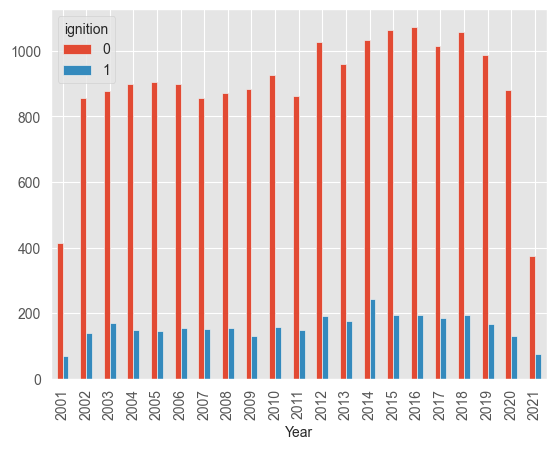

In [86]:
pd.crosstab(df.Year, df.ignition).plot(kind='bar')
df.corr()

We can suppose that the Year has not great relevance in our analysis; it seems to be difficult find a relation between ignition points and Year; moreover, looking at the correlation matrix we can see that it has a very weak correlation with other variables and also the plot above doesn't show any particular pattern, so, for sake of simplicity, I decide to drop also this column

In [87]:
df = df.drop('Year', axis = 1)

Now I want to have a look to the two classes: ignition = 0 vs ignition = 1

In [88]:
data_1=df.loc[df["ignition"] == 1] # I take data where an ignition occurred
data_0=df.loc[df["ignition"] == 0] # I take data where an ignition didn't occurr
data_1.shape # (nrow=3320, ncol=35)
data_0.shape # (nrow=18710, ncol=35)

(18710, 35)

And I plot some variables to see their distribution

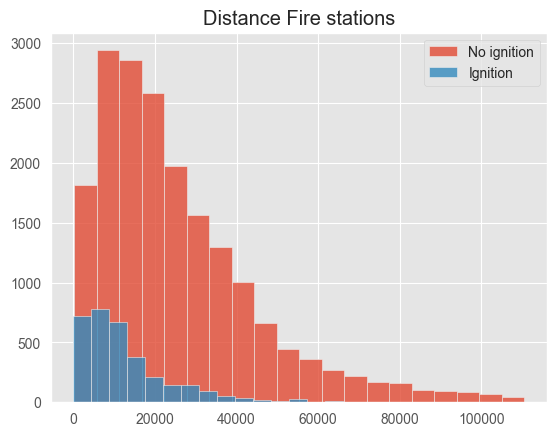

In [89]:
plt.style.use("ggplot")
plt.title("Distance Fire stations")
plt.hist(data_0["distance_fire_stations"],bins=20,  alpha=0.8, label='No ignition')
plt.hist(data_1["distance_fire_stations"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

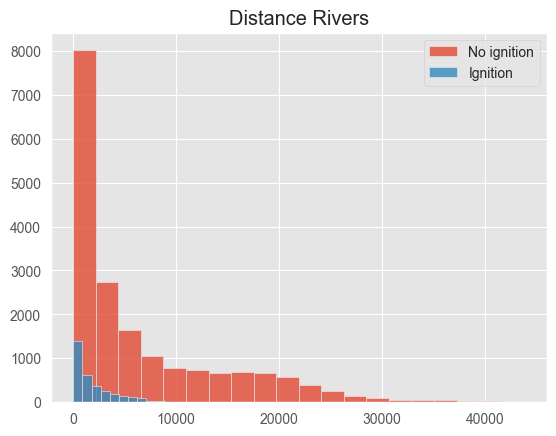

In [90]:
plt.style.use("ggplot")
plt.title("Distance Rivers")
plt.hist(data_0["distance_rivers"],bins=20,  alpha=0.8, label='No ignition')
plt.hist(data_1["distance_rivers"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

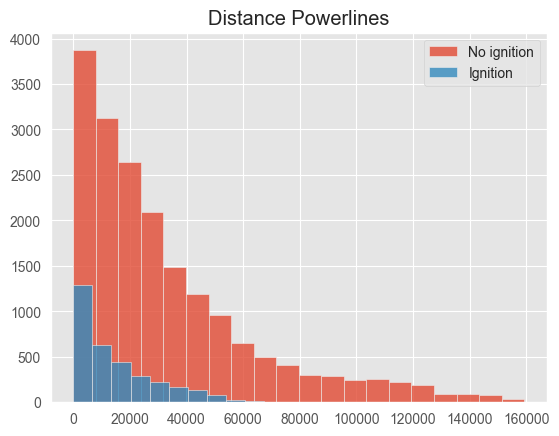

In [91]:
plt.style.use("ggplot")
plt.title("Distance Powerlines")
plt.hist(data_0["distance_powerlines"],bins=20,  alpha=0.8, label='No ignition')
plt.hist(data_1["distance_powerlines"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


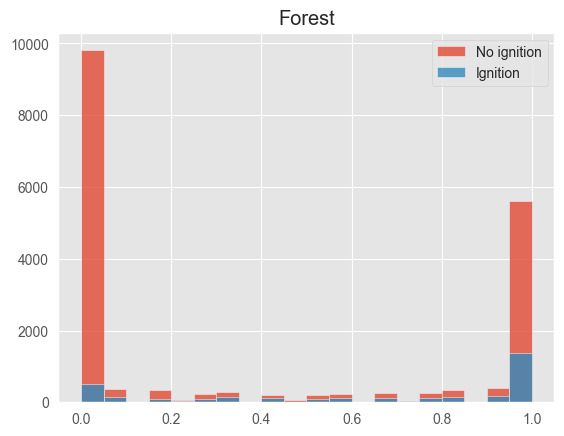

In [92]:
plt.legend()
plt.style.use("ggplot")
plt.title("Forest")
plt.hist(data_0["forest"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["forest"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


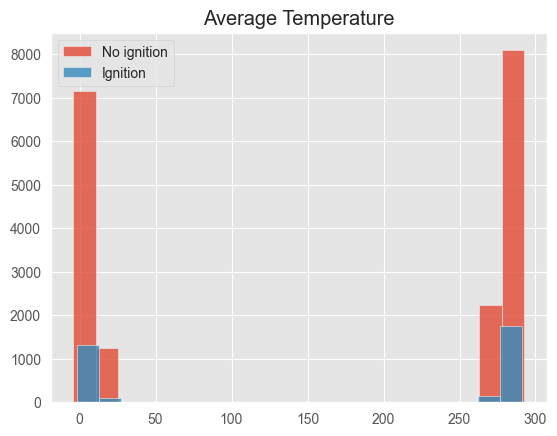

In [93]:
plt.legend()
plt.style.use("ggplot")
plt.title("Average Temperature")
plt.hist(data_0["avg_temp"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["avg_temp"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


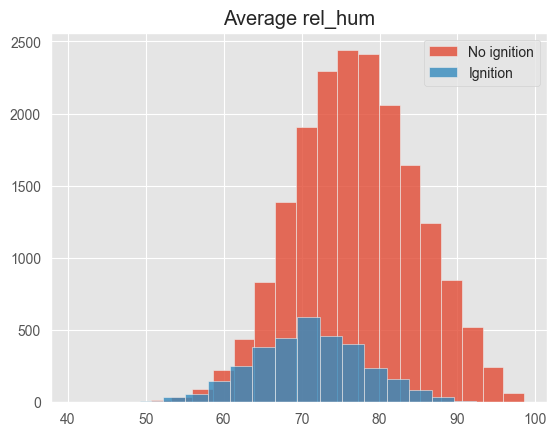

In [94]:
plt.legend()
plt.style.use("ggplot")
plt.title("Average rel_hum")
plt.hist(data_0["avg_rel_hum"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["avg_rel_hum"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


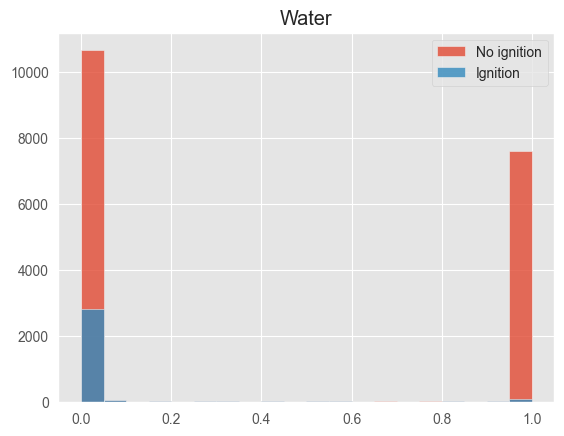

In [95]:
plt.legend()
plt.style.use("ggplot")
plt.title("Water")
plt.hist(data_0["water"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["water"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

Of course, we have much more 'No ignition' data, but the distribution is similar among the two classes.

In [96]:
data_0 = data_0[['vegetation_class', 'ignition']]
data_1 = data_1[['vegetation_class', 'ignition']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


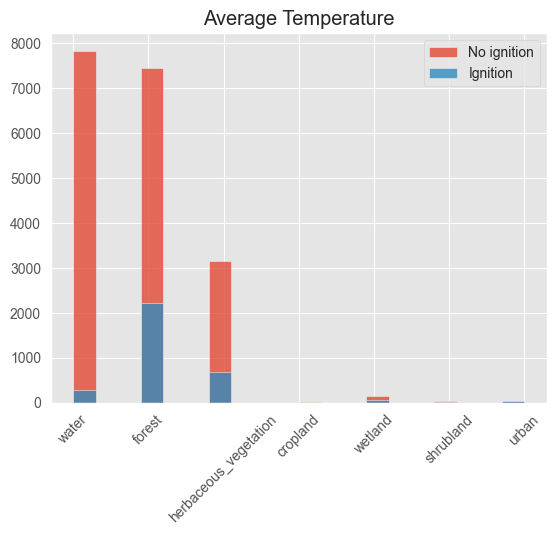

In [97]:
plt.legend()
plt.style.use("ggplot")
plt.title("Average Temperature")
plt.xticks(rotation = 45)
plt.hist(data_0["vegetation_class"], bins=20, alpha=0.8, label='No ignition')
plt.hist(data_1["vegetation_class"], bins=20, alpha=0.8, label='Ignition')
plt.legend()

The plot above confirms the fact that the most present classes are 'water', 'forest' and 'herbaceous_vegetation'. Data can be consistent with intuition, indeed we can imagine that forest

In [98]:
data_0.loc[data_0.vegetation_class == 'urban'] #41
data_1.loc[data_1.vegetation_class == 'urban'] #40
data_0.loc[data_0.vegetation_class == 'shrubland'] #52
data_1.loc[data_1.vegetation_class == 'shrubland'] #14
data_0.loc[data_0.vegetation_class == 'wetland'] #158
data_1.loc[data_1.vegetation_class == 'wetland'] #66
data_0.loc[data_0.vegetation_class == 'cropland'] #27
data_1.loc[data_1.vegetation_class == 'cropland'] #0: No ignition points in cropland areas
data_0.loc[data_0.vegetation_class == 'forest'] #7446
data_1.loc[data_1.vegetation_class == 'forest'] #2227
data_0.loc[data_0.vegetation_class == 'herbaceous_vegetation'] #3156
data_1.loc[data_1.vegetation_class == 'herbaceous_vegetation'] #695
data_0.loc[data_0.vegetation_class == 'water'] #7830
data_1.loc[data_1.vegetation_class == 'water'] #278

,vegetation_class,ignition
145,water,1
188,water,1
199,water,1
200,water,1
282,water,1
...,...,...
3160,water,1
3161,water,1
3176,water,1
3178,water,1


### Correlation matrix
I visualize the correlation matrix, related to 'ignition'.

C:\Users\David\AppData\Local\Temp\ipykernel_23412\2252110568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

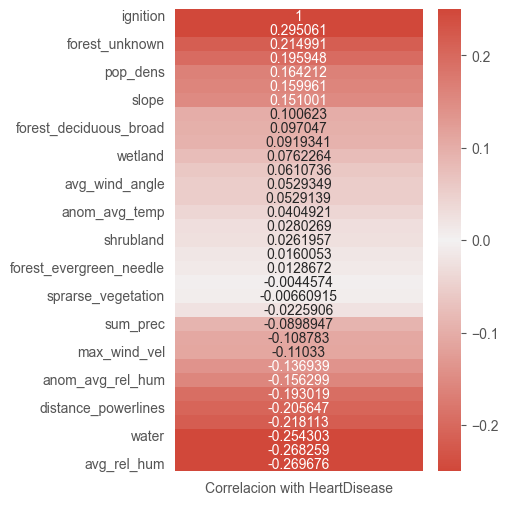

In [99]:
plt.figure(figsize=(4, 6))
correlation = df.corr()
a = correlation['ignition']
cmap = sns.diverging_palette(15, 15, as_cmap=True)
one_column = pd.DataFrame({"Correlacion with HeartDisease": a[1:]},
                  index=a.index[1:])
corrHD=one_column.sort_values(by='Correlacion with HeartDisease', ascending = False)
sns.heatmap(corrHD,vmin=-0.25, vmax=0.25, annot=True, fmt="g", cmap=cmap, center=0)

While here I take the whole correlation matrix, without the 'vegetation_class' and the 'ignition'; while below I consider also the 'ignition' column. It's interesting to see the more correlated variables.

C:\Users\David\AppData\Local\Temp\ipykernel_23412\3873832991.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1=df.drop('vegetation_class', 1)
C:\Users\David\AppData\Local\Temp\ipykernel_23412\3873832991.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('ignition', 1)


<Axes: >

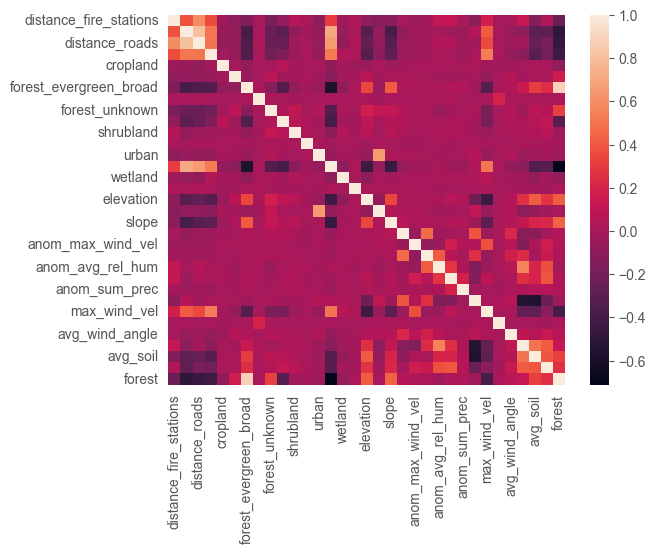

In [100]:
df1=df.drop('vegetation_class', 1)
df1 = df1.drop('ignition', 1)
df1=abs(df1)
corr1=df1.corr()
sns.heatmap(corr1)

C:\Users\David\AppData\Local\Temp\ipykernel_23412\74369420.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df.drop('vegetation_class', 1)


<Axes: >

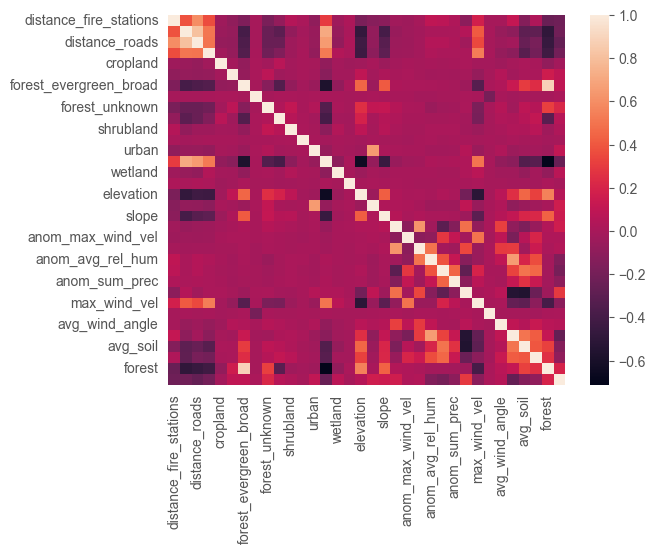

In [101]:
df1 = df.drop('vegetation_class', 1)
corr2 = df1.corr()
sns.heatmap(corr2)

I want to see now the more correlated variables, both with 'ignition' and with others. I select the 5 highest values and the related variables below.

In [102]:
corr2["ignition"].sort_values()

avg_rel_hum               -0.269676
distance_roads            -0.268259
water                     -0.254303
distance_fire_stations    -0.228656
distance_rivers           -0.218113
distance_powerlines       -0.205647
anom_avg_soil             -0.193019
anom_avg_rel_hum          -0.156299
avg_soil                  -0.136939
max_wind_vel              -0.110330
anom_sum_prec             -0.108783
sum_prec                  -0.089895
cropland                  -0.022591
sprarse_vegetation        -0.006609
aspect                    -0.004457
forest_evergreen_needle    0.012867
avg_temp                   0.016005
shrubland                  0.026196
anom_max_wind_vel          0.028027
anom_avg_temp              0.040492
elevation                  0.052914
avg_wind_angle             0.052935
herbaceous_vegetation      0.061074
wetland                    0.076226
forest_evergreen_broad     0.091934
forest_deciduous_broad     0.097047
urban                      0.100623
slope                      0

In [103]:
arr=abs(corr1.unstack()).sort_values(ascending=False) #tomo los valores absolutos de la matrix en una sola columna, ordino decrescente
pd.set_option('display.max_rows', 1000)
arr= arr[arr!=1]
#Claramente tendrè valores doble, porque la matriz es simmetrica
#Tomar las 5 mas relaccionadas significa elegir las filas: 0,2,4,6,8
top5=arr[0:9:2]
top5


forest           forest_evergreen_broad    0.883029
distance_roads   distance_rivers           0.810262
water            forest                    0.711197
distance_rivers  water                     0.711018
distance_roads   water                     0.650302
dtype: float64

Clearly, since forest is the sum of all 'forest' values, there is high correlation with forest_evergreen_broad, but this was easy to imagine. Other correlated variables are distance_roads and distance_rivers and we can enforce the result also thanks to the plot below: there is a linear dependence between them.
For the moment I decided to keep all the variables and then I will perform a feature selection the reduce the total number.

<Axes: xlabel='forest', ylabel='forest_evergreen_broad'>

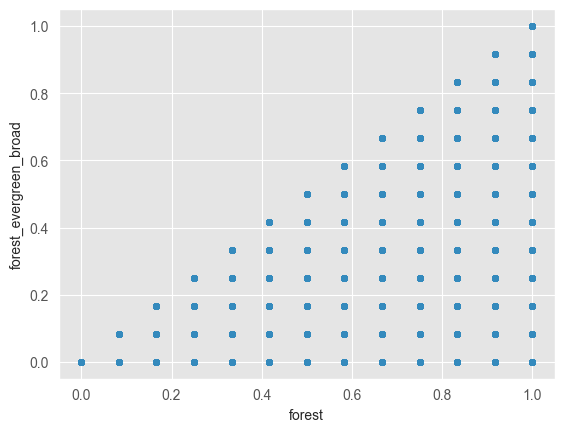

In [104]:
top2corr = df[["forest_evergreen_broad", "forest"]] #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="forest", y="forest_evergreen_broad") #hago el scatterplot con el comando .plot.scatter

<Axes: xlabel='distance_roads', ylabel='distance_rivers'>

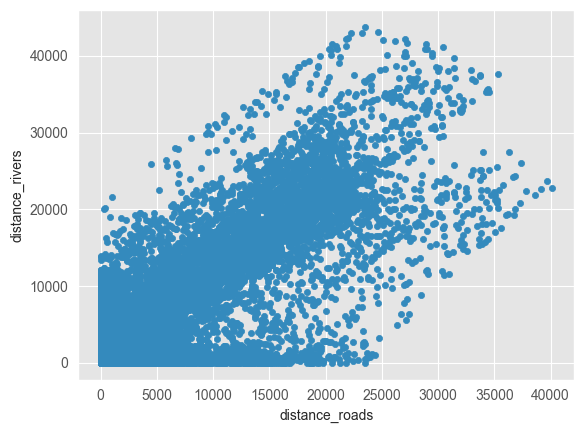

In [105]:
top2corr = df[["distance_roads", "distance_rivers"]] #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="distance_roads", y="distance_rivers") #hago el scatterplot con el comando .plot.scatter

<Axes: xlabel='water', ylabel='forest'>

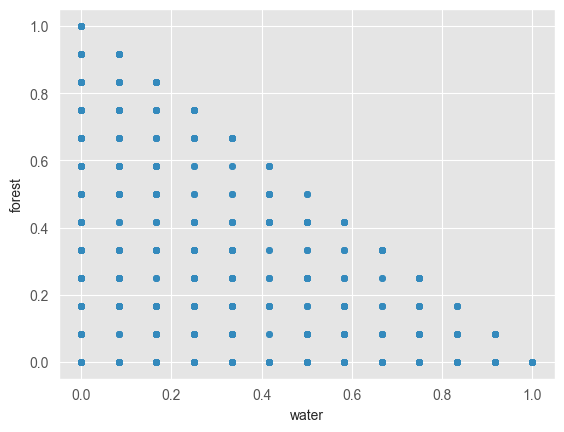

In [106]:
top2corr = df[["water", "forest"]]  #creo un dataframe con solo las dos mas correlacionadas
top2corr.plot.scatter(x="water", y="forest")  #hago el scatterplot con el comando .plot.scatter


<Axes: xlabel='distance_rivers', ylabel='water'>

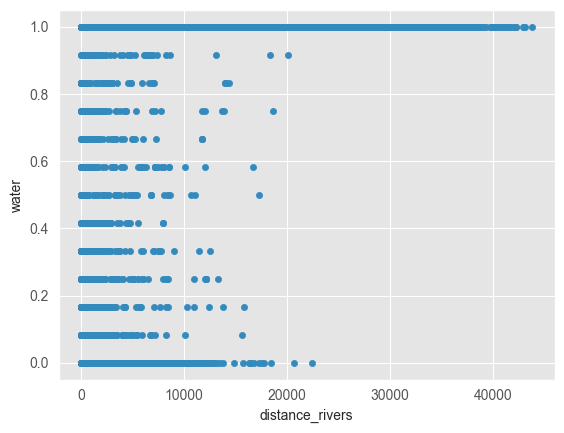

In [107]:
top2corr = df[["distance_rivers", "water"]]
top2corr.plot.scatter(x="distance_rivers", y="water")

I'm almost ready to perform my classification, I need to create dummy variables for my 'vegetation_class' and add them to my dataset.

In [108]:
pd.get_dummies(df.vegetation_class)

,cropland,forest,herbaceous_vegetation,shrubland,urban,water,wetland
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
22030,0,0,0,0,0,1,0
22031,0,1,0,0,0,0,0
22032,0,1,0,0,0,0,0
22033,0,0,0,0,0,1,0


In [109]:
dummy=pd.get_dummies(df.vegetation_class)
dummy.rename(columns={'cropland': 'cropland_dummy', 'forest': 'forest_dummy', 'herbaceous_vegetation': 'herbaceous_vegetation_dummy', 'shrubland': 'shrubland_dummy', 'urban': 'urban_dummy', 'water': 'water_dummy',
                      'wetland': 'wetland_dummy'}, inplace=True)
#dummy.head()
df1=df.join(dummy)
df1.head()

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,forest,vegetation_class,ignition,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
0,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,1.000000,forest,1,0,1,0,0,0,0,0
1,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.416667,0.0,0.416667,0.166667,...,0.833333,forest,1,0,1,0,0,0,0,0
2,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.666667,0.0,0.333333,0.000000,...,1.000000,forest,1,0,1,0,0,0,0,0
3,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.000000,0.0,0.000000,0.166667,...,0.000000,wetland,1,0,0,0,0,0,0,1
4,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.750000,0.0,0.166667,0.083333,...,0.916667,forest,1,0,1,0,0,0,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


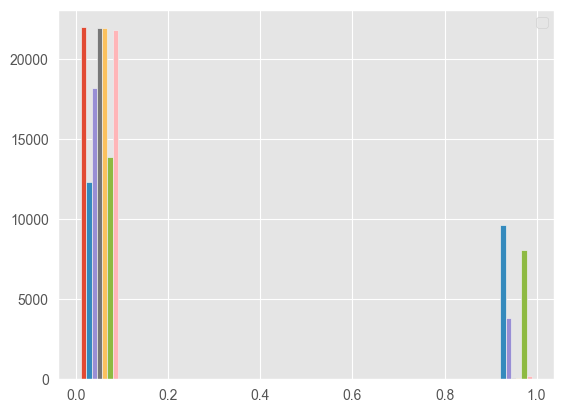

In [110]:
plt.legend()
plt.style.use('ggplot')
plt.hist(dummy)
plt.legend()

Last step before the classification is to drop the 'vegetation_class', since I created the dummy variables and I don't need it anymore, and I sample the dataset in order to randomize the occurrence of ignition points.

In [148]:
df1 = df1.drop('vegetation_class', 1)
df1=df1.sample(frac=1) # I sample the data since ignition points are not randomly divided

C:\Users\David\AppData\Local\Temp\ipykernel_23412\3947938703.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('vegetation_class', 1)


KeyError: "['vegetation_class'] not found in axis"

In [251]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import time

First of all, I scale data with MinMaxScaler, in order to translate the feature between 0 and 1. I could have used also Standard Scaler, but I would have checked the gaussianity of my data. Since we have very different scales between data, I preferred to scale them before continuing in my analysis.

In [252]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df1)
new_scaled = pd.DataFrame(x_scaled)
new_scaled.columns = df1.columns
new_scaled

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_evergreen_broad,forest_evergreen_needle,forest_unknown,herbaceous_vegetation,...,sum_prec,forest,ignition,cropland_dummy,forest_dummy,herbaceous_vegetation_dummy,shrubland_dummy,urban_dummy,water_dummy,wetland_dummy
0,0.383004,0.005710,0.417205,0.292555,0.0,0.0,0.000000,1.0,0.000000,1.000000,...,2.169032e-01,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.074986,0.034731,0.062353,0.056506,0.0,0.0,0.000000,1.0,0.000000,0.000000,...,1.216571e-02,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.036489,0.012767,0.006235,0.084759,0.0,0.0,0.083333,1.0,0.000000,0.166667,...,3.558546e-02,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.440396,0.017129,0.012471,0.167949,0.0,0.0,0.166667,1.0,0.083333,0.583333,...,2.702607e-01,0.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.135854,0.112468,0.013943,0.027412,0.0,0.0,1.000000,1.0,0.000000,0.000000,...,5.062149e-02,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22025,0.487380,0.005710,0.044963,0.180533,0.0,0.0,0.333333,0.0,0.083333,0.000000,...,5.356096e-01,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22026,0.469478,0.637037,0.490333,0.219145,0.0,0.0,0.000000,1.0,0.000000,0.000000,...,1.842375e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22027,0.111093,0.005710,0.012471,0.185573,0.0,0.0,0.000000,1.0,0.000000,1.000000,...,3.006818e-03,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22028,0.165985,0.036560,0.006235,0.124089,0.0,0.0,1.000000,0.0,0.000000,0.000000,...,3.668836e-02,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


I set as X all my data except my target column 'ignition' and to y exactly my target column.

In [308]:
X = new_scaled.loc[:, new_scaled.columns != 'ignition']
y = new_scaled.loc[:, new_scaled.columns == 'ignition']
X.shape

(22030, 40)

As I pointed above, I have unbalanced data and this could represent a problem, because, absurdly, classifying all data to 0, I could reach, maybe, acceptable result in terms of metrics, but I would completely miss the aim of the work.
For this reason, the next step will be 'cover this gap', namely I over-sample using the SMOTE function, which, instead of creating copies from the 'ignition=1'-class (the minor class), will create synthetic samples from it.
Be careful! I will oversample only over the training data, because it is the part that I need for my model and none of the information in the test data is being used to create synthetic observations.

In [319]:
os = SMOTE(random_state=0)
X_arr = np.array(X)
y_arr = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state=0)
#X_train = pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)
#y_train = pd.DataFrame(y_train)
#y_test = pd.DataFrame(y_test)
#X_train.columns = X.columns
#X_test.columns=X.columns
#y_train.columns=y.columns
#y_test.columns=y.columns
#X_train
X_test

array([[0.12311891, 0.05386539, 0.00623528, ..., 0.        , 0.        ,
        0.        ],
       [0.20172196, 0.40090203, 0.14341148, ..., 0.        , 1.        ,
        0.        ],
       [0.01518047, 0.0285486 , 0.02248163, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22567388, 0.11304668, 0.03117641, ..., 0.        , 0.        ,
        0.        ],
       [0.0675109 , 0.05386539, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57276406, 0.        , 0.40124413, ..., 0.        , 0.        ,
        0.        ]])

In [323]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X)
os_data_y = pd.DataFrame(data=os_data_y)
X_test=pd.DataFrame(data=X_test)
y_test=pd.DataFrame(data=y_test)

In [324]:
os_data_X.columns=X.columns
os_data_y.columns=y.columns
X_test.columns=X.columns
y_test.columns=y.columns

In [326]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['ignition']==0]))
print("Number of subscription",len(os_data_y[os_data_y['ignition']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['ignition']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['ignition']==1])/len(os_data_X))

length of oversampled data is  26228
Number of no subscription in oversampled data 13114
Number of subscription 13114
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [327]:
data_final_vars=new_scaled.columns.values.tolist()
y=['ignition']
X=[i for i in data_final_vars if i not in y]
y

['ignition']

# Logistic Regression

I decided to start my analysis with the Logistic Regression.
Since we have a lot of features, I also apply an algorithm for feature selection, in particular I choose RFE, Recursive Feature Elimination: the goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [328]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[ True  True  True  True  True False  True False False False False  True
 False  True  True False  True False  True False False False False  True
  True  True  True False False  True False  True  True False False False
 False False  True  True]
[ 1  1  1  1  1  4  1 15  5  8  7  1  9  1  1 20  1  3  1 10 14  2 16  1
  1  1  1 21 12  1 11  1  1 13 18 19 17  6  1  1]


rfe.support returns True if the feature is relevant, False otherwise, so the algorithm helped me to select only a subset of feature, which is reported here below.

In [329]:
rfe.support_.shape

(40,)

In [330]:
cols=[]
for i in range(0,rfe.support_.shape[0]):
    if rfe.support_[i]==True : cols.append(X[i])
cols

['distance_fire_stations',
 'distance_rivers',
 'distance_roads',
 'distance_powerlines',
 'cropland',
 'forest_evergreen_broad',
 'sprarse_vegetation',
 'water',
 'wetland',
 'elevation',
 'slope',
 'anom_avg_soil',
 'anom_sum_prec',
 'max_temp',
 'max_wind_vel',
 'avg_rel_hum',
 'sum_prec',
 'forest',
 'water_dummy',
 'wetland_dummy']

Finally, I select only the features remained and I perform the Logistic Regression.

In [331]:
X=os_data_X[cols]
y=os_data_y['ignition']

In [332]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.398936
         Iterations: 35
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.424     
Dependent Variable:       ignition             AIC:                  20966.5709
Date:                     2023-03-07 17:06     BIC:                  21130.0626
No. Observations:         26228                Log-Likelihood:       -10463.   
Df Model:                 19                   LL-Null:              -18180.   
Df Residuals:             26208                LLR p-value:          0.0000    
Converged:                0.0000               Scale:                1.0000    
No. Iterations:           35.0000                                              
-------------------------------------------------------------------------------
                         Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
-------------------------------------------------------------------------------
distanc

C:\Users\David\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p-values are all under 0.05 except for one variable: 'sprarse_vegetation', so we can remove it

In [333]:
cols.remove('sprarse_vegetation')
len(cols)

19

In [334]:
X=os_data_X[cols]
y=os_data_y['ignition']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.399134
         Iterations 8
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.424     
Dependent Variable:    ignition            AIC:                 20974.9846
Date:                  2023-03-07 17:06    BIC:                 21130.3017
No. Observations:      26228               Log-Likelihood:      -10468.   
Df Model:              18                  LL-Null:             -18180.   
Df Residuals:          26209               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        8.0000                                             
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
distance_fire_stations  -0.5

Let's have a look to our results:
- 'distances' have all a negative coefficient, in particular distance_roads, we can suppose that humans can act more promptly when the site is easily accessible;
- 'max_temp', 'forest', 'wetland' and 'avg_wind_vel' have all positive coefficients and this is also intuitive, since temperature and wind can influence fires, while forest and wetland had a significant percentage of ignition points;
- 'cropland' and 'sum_prec' have negative impact, but of course precipitations prevent fires and also cropland implies human activity, so more difficulty in having fires.

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [341]:
#X_test.colums = X.columns
X_test = X_test[cols]
X_test

,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_evergreen_broad,water,wetland,elevation,slope,anom_avg_soil,anom_sum_prec,max_temp,max_wind_vel,avg_rel_hum,sum_prec,forest,water_dummy,wetland_dummy
0,0.123119,0.053865,0.006235,0.003510,0.0,1.000000,0.000000,0.000000,0.418868,0.153234,0.494779,0.529113,0.506023,0.112220,0.607539,3.513317e-03,1.000000,0.0,0.0
1,0.201722,0.400902,0.143411,0.348302,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.461983,0.339332,0.428229,0.525122,0.540533,1.842375e-07,0.000000,1.0,0.0
2,0.015180,0.028549,0.022482,0.069081,0.0,0.000000,0.916667,0.000000,0.000000,0.505536,0.627328,0.455586,0.694903,0.201139,0.671769,4.050747e-02,0.000000,1.0,0.0
3,0.063039,0.005710,0.000000,0.186150,0.0,0.666667,0.000000,0.000000,0.085535,0.187788,0.571505,0.360774,0.567915,0.214077,0.752414,1.842375e-07,0.833333,0.0,0.0
4,0.092145,0.117709,0.022482,0.121835,0.0,0.250000,0.000000,0.000000,0.113208,0.064822,0.491727,0.454504,0.593415,0.197552,0.786231,1.835402e-01,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6604,0.337964,0.104817,0.110313,0.345272,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.286172,0.317948,0.445499,0.379468,0.486177,1.842375e-07,0.000000,1.0,0.0
6605,0.473226,0.000000,0.039435,0.381238,0.0,0.250000,0.000000,0.666667,0.072327,0.192922,0.432701,0.259717,0.486798,0.422793,0.607277,5.526546e-02,0.333333,0.0,1.0
6606,0.225674,0.113047,0.031176,0.078669,0.0,0.333333,0.000000,0.000000,0.695597,0.070409,0.361902,0.248662,0.411335,0.234400,0.479367,4.526608e-03,1.000000,0.0,0.0
6607,0.067511,0.053865,0.000000,0.037671,0.0,0.250000,0.000000,0.000000,0.306918,0.051281,0.517251,0.290435,0.452125,0.179251,0.669083,4.215255e-02,1.000000,0.0,0.0


In [342]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [343]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4387 1209]
 [ 132  881]]


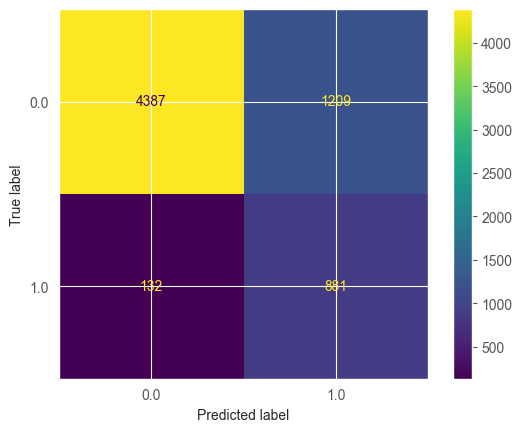

In [344]:
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=logreg.classes_)
  disp.plot()

In [345]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.78      0.87      5596
         1.0       0.42      0.87      0.57      1013

    accuracy                           0.80      6609
   macro avg       0.70      0.83      0.72      6609
weighted avg       0.89      0.80      0.82      6609



Having a look to the metrics and to the confusion matrix, we can note a 0 class is very well classified, but the problem is on 1 class, in particular precision metric is quite low, which means that I have an high number of false positive. False positive means points classified as 1, but which actually were 0. Clearly, from a sustainable point of view this would be acceptable, if we want to reduce the impact of fires, on the other hand we have to consider also that company pays in relation to the probability and the classificator fails in his aim so we cannot consider it acceptable.

Of course, there are a lot of possibilities and a lot of procedure to test:
- change scaler (like Standard Scaler, etc);
- test other possible classificators (we will test a few of them here below);
- try to reduce the dimensionality (PCA).

 It also depends on the needs: because if we want to prevent at any cost fires, we should look at the recall, in order to minimize the false negative, namely the events classified as 0, but which instead were 1.

# Other Classification Methods

I'll test other classificators, in particular I want to test KNN.
However, as we will see below, the results are even worst than before, so I have to follow another path.


Set a function able to perform the classification.

In [447]:
def classify(clf, X, y, alpha):
  #X = df[df.columns[+1:]]
  #y= df[df.columns[0]]
  target_names = ['0', '1']
  start=time.time()
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=alpha,random_state=2)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  TimeL=time.time() - start
  print("Clasificacion:")
  print(clf)
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("%s seconds" % (time.time() - start))

  cm=confusion_matrix(y_test , y_pred) #, normalize="true")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  return

In [448]:
X_reset = df1.loc[:, df1.columns != 'ignition'] # I recover the original data, before features selection
y_reset = df1.loc[:, df1.columns == 'ignition'] #

X_reset_rfe = X_reset[cols]

X_scaled_reset = new_scaled.loc[:, new_scaled.columns != 'ignition']
y_scaled_reset = new_scaled.loc[:, new_scaled.columns == 'ignition']
#X_os_reset = os_data_X.loc[:, os_data_X.columns != 'ignition']
#X_os_reset_rfe = X_os_reset[cols]

In [449]:
classify(KNeighborsClassifier(n_neighbors=5), X_reset, y_reset, 0.2)

C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Clasificacion:
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3742
           1       0.54      0.37      0.44       664

    accuracy                           0.86      4406
   macro avg       0.72      0.66      0.68      4406
weighted avg       0.84      0.86      0.85      4406

3.3683078289031982 seconds


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
classify(KNeighborsClassifier(n_neighbors=5), X_reset_rfe, y_reset, 0.2)

In [362]:
classify(KNeighborsClassifier(n_neighbors=5), X_scaled_reset, y_scaled_reset, 0.2)

C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Clasificacion:
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3742
           1       0.56      0.40      0.47       664

    accuracy                           0.86      4406
   macro avg       0.73      0.67      0.69      4406
weighted avg       0.85      0.86      0.85      4406

3.6897902488708496 seconds


C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


TypeError: 'numpy.ndarray' object is not callable

Set a function which takes into account also the oversampling:

In [372]:
def classify_oversampling(clf, X, y, alpha):
  #X = df[df.columns[+1:]]
  #y= df[df.columns[0]]
  target_names = ['0', '1']
  start=time.time()

  os = SMOTE(random_state=0)
  X_arr = np.array(X)
  y_arr = np.array(y)
  X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, stratify=y, test_size=alpha,random_state=2)

  os_data_X, os_data_y = os.fit_resample(X_train, y_train)


  os_data_X = pd.DataFrame(data=os_data_X)
  os_data_y = pd.DataFrame(data=os_data_y)
  X_test = pd.DataFrame(data=X_test)
  y_test = pd.DataFrame(data=y_test)
  os_data_X.columns = X.columns
  os_data_y.columns = y.columns
  X_test.columns = X.columns
  y_test.columns = y.columns


  clf = clf.fit(os_data_X,os_data_y)
  y_pred = clf.predict(X_test)
  #y_pred = pd.DataFrame(y_pred)
  TimeL=time.time() - start
  print("Clasificacion:")
  print(clf)
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("%s seconds" % (time.time() - start))

  cm=confusion_matrix(y_test , y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  return

In [371]:
classify_oversampling(KNeighborsClassifier(n_neighbors=5), X_scaled_reset, y_reset, 0.2)


C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Clasificacion:
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      3742
           1       0.36      0.83      0.51       664

    accuracy                           0.76      4406
   macro avg       0.66      0.79      0.67      4406
weighted avg       0.87      0.76      0.79      4406

4.216889142990112 seconds


C:\Users\David\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


TypeError: 'numpy.ndarray' object is not callable